#Introduction 
In recent years, rhetoric about the border with Mexico has garnered significant attention from U.S. policymakers. Their constituents care about immigration policy. A Pew study ahead of the 2020 election found that 61% of Republican voters and 46% of Democratic voters prioritized immigration when deciding their vote. The same organization in a report ahead of the 2022 midterms found that 76% of Republican voters and 36% of Democratic voters prioritized this topic. From 2018 - 2022, during the 116th and 117th U.S. Congresses, representatives from both parties spoke on the house floor and framed issues at the border as crises that required severe policy intervention: child separation, drug smugglers, infected migrants. The power balance of Washington tilted between these two periods: during the 116th Congress (2019 - 2021), Republicans held the Presidency and the Senate. Democrats held the House. During the 117th Congress, Democrats held all three. The analysis undertaken in this project shows how border rhetoric on the house floor changed over the course of these two cycles by analyzing transcripts from both periods. 

My initial hypothesis was that my project would show stark changes in border rhetoric on the house floor as party control changed in Washington. There is no clear policy solution to the various border crises that exist today; I guessed that rhetoric decrying border issues would prove to be the most salient words in both transcript groups, a political cudgel of the weaker party. In the 116th session, I predicted that the transcripts would show Democrats criticizing the brutality of executive policies and emphasizing the vulnerability of migrants.   

The dataset of urls and associated texts used in this project comes from the digitized transcripts of house proceedings available at the the Library of Congress website. The transcripts vary widely in purpose and length; some are shorter responses to events in the house while others are longer, more purposeful policy advocacy. The analysis implements functions and for-loops while creating visual representations that indicate how and when the word “border” was used in either session. Pandas, WordClouds, and nltk all implemented. As I began analysis, I realized that the data did not offer an exact comparison between Democratic rhetoric and Republican rhetoric, as the representatives spoke in more nuanced terms than I expected. Instead, I found a comparison between a humanitarian, sympathetic view of the migrant plight and one that amplified deterrence and national security. 

My analysis supports my hypothesis that the opposition party in Washington spoke more about crises at the border, while it does not prove the exact party delineation I expected. During the 116th Congress, the most salient words in the “border” transcripts reflected a case for humane values and welcome attitudes. In the 117th, this perspective was far less common. Instead, the most conspicuous rhetoric argued against the dangers posed by lax border security. One unexpected insight offered by this analysis was the several periods when the border was not mentioned on the house floor - what other events caused this dearth?  This project offers a first step into a greater analysis of the intersection of policy making and the politics that may slow down policy making.  

Methodology
I performed the following script and analysis on two datasets, one for each session of Congress. I wrote and ran the python script in a Jupyter Notebook ipynb file. Besides built-in python features and modules like glob, the libraries I used included requests, BeautifulSoup, Pandas, WordCloud, matplotlib, and nltk. The methodology of this analysis consists of two parts: web scraping and text analysis. 
    
The web scraping analysis script is derived from the workshop “Web Scraping Media URLs in Python” by Rebecca Krisel (workshop). I found the specific set of URLs from a search within the digitized Library of Congress archives of house proceedings available at https://www.congress.gov/. The search specified results from the session of Congress in question. Within that framing, it pulled any transcript that included at least one mention of the word “border” in either the heading or in the body of the transcript. As permitted by the Library, I downloaded these results as a csv file. The csv file has as rows the urls to text files that include the relevant transcripts. The columns of the csv file added the following information to each url in the dataset: the title of the transcript; the date it was said; and the page number and volume in the Congressional record.

The web scraping in this project relied on the “Web Scraping” workshop, starting with a function called scrape_article. The function uses requests.get to retrieve the information from the url, encodes it with utf - 8, and returns the html text from the url – the transcript text – as a variable. Once the function was established, I applied it to the data in the cells under the URL column, storing the text data from each url within a single variable, distinguishing each transcript within that variable with an ID index that numbered each url text. I stored this text of every transcript in one file. I then created a for loop to process this text with the html processor BeautifulSoup, clearing away any lingering html code from the text file. The next step was to create a single file for each transcript by identifying each individually according to its number in the larger document. 
	
I chose WordClouds and nltk as methods of analysis as they provided efficient means of digestible comparisons between the transcripts of the two periods. The script I used for text analysis was adapted closely from sections of both the Web Scraping workshop and also the Text Analysis Workshop from the CUNY Graduate Center DRI.  (https://gc-dri.github.io/Dhrift-GC/workshops/text-analysis/?page=1). The script for ‘cleaning’ my text files, or making them easier to analyze, depends largely on nltk. The first step was to process out of the text what nltk considers “stopwords,” articles and other frequent words that do not add meaning to the text. My dataframes required additions to the stopwords. Each webpage from the Library contains a phrase at the top explaining the sourcing of the text; in addition to those words, I experimented with adding different words to the stopwords list that appeared as part of formalities in the transcripts. For instance, many transcripts include phrases indicating that a member “asked and was given permission to address the House for 1 minute and to revise and extend his remarks” or similar procedural details. Eventually, I was able to identify 71 unimportant words that could clutter this project analysis and added them to the stopwords list. The final steps in cleaning the text, still following the workshop, were to first use nltk to make all words lowercase. Then, to “lemmatize” - a built in nltk feature that makes different words with a shared root word the same, amplifying the presence of a subject that may be represented by varying words in the original text.  

The text analysis involved in this project created three main points of comparisons between the rhetoric of the two sessions: frequency of general border rhetoric over time, language specific to border policies unique to either sessions, and the presence of broader border narratives (advocating humanitarian intervention vs. preventing unauthorized entry). The corresponding scripts are adapted or copied from the mentioned workshops and also Geeks for Geeks (geeksforgeeks.com). To address general rhetoric, I created a function that utilized the count feature in nltk to count the number of appearances of “border” in each text file and add them as a new column in the pandas dataframe. I made a time series with this column as the y-axis and the dates of transcripts as the x-axis. This graph pointed out peaks and troughs in the mentions of “border” throughout the two sessions. These extremes guided my next steps – what caused them? 

To analyze the peaks, I researched attention-grabbing border policies that happened in those time periods. To confirm that these policies were the causes of dense periods of border rhetoric, I implemented a dispersion plot to track appearances of rhetoric about policies, particularly Migrant Protection Protocols, also known as Remain in Mexico, and Title 42. These plots also provided the start of an analysis of my hypothesis that not all rhetoric shifts were easily connected to changing realities at the border. To further investigate this assumption, I utilized the nltk features concordance and similar. Finally, I created word clouds of the processed texts in an attempt to glean a view that least emphasized specific policies. 


In [ ]:
#Part 1 - Data Cleaning, organizing 
#Closely adapting the Web Scraping Workshop by Rebecca Krisel at https://github.com/rskrisel/web_scraping_workshop

In [17]:
#Installing the libraries needed for Web Scraping and Text Analysis
conda install requests 

Solving environment: done

## Package Plan ##

  environment location: /Users/williamedwards/opt/anaconda3

  added / updated specs:
    - requests


The following packages will be UPDATED:

  ca-certificates    conda-forge::ca-certificates-2022.12.~ --> pkgs/main::ca-certificates-2023.01.10-hecd8cb5_0 

The following packages will be SUPERSEDED by a higher-priority channel:

  certifi            conda-forge/noarch::certifi-2022.12.7~ --> pkgs/main/osx-64::certifi-2022.12.7-py39hecd8cb5_0 
  openssl            conda-forge::openssl-1.1.1t-hfd90126_0 --> pkgs/main::openssl-1.1.1t-hca72f7f_0 




Preparing transaction: done
Verifying transaction: done
Executing transaction: done

Note: you may need to restart the kernel to use updated packages.


In [18]:
!-m pip install beautifulsoup4

/bin/bash: - : invalid option
Usage:	/bin/bash [GNU long option] [option] ...
	/bin/bash [GNU long option] [option] script-file ...
GNU long options:
	--debug
	--debugger
	--dump-po-strings
	--dump-strings
	--help
	--init-file
	--login
	--noediting
	--noprofile
	--norc
	--posix
	--protected
	--rcfile
	--restricted
	--verbose
	--version
	--wordexp
Shell options:
	-irsD or -c command or -O shopt_option		(invocation only)
	-abefhkmnptuvxBCHP or -o option


In [1]:
import nltk
import pandas as pd


In [56]:
import pandas as pd
#Viewing the initial csv file as a pandas data frame. 
data_df = pd.read_csv("116_Congress_Border_URLs.csv", delimiter=',', encoding='utf-8')
data_df

,Title,URLS,Issue Date,Volume,Number,Page
0,NaN,NaN,NaN,NaN,NaN,NaN
1,PERMISSION FOR COMMITTEE ON HOMELAND SECURITY ...,https://www.congress.gov/116/crec/2020/12/10/1...,12/10/2020,166.0,209.0,H7129
2,ADDING COUNTIES TO THE SOUTHWEST BORDER REGION...,https://www.congress.gov/116/crec/2020/11/19/m...,11/19/2020,166.0,197.0,H5982
3,RECOGNIZING ESCALATION OF VIOLENCE ALONG ARMEN...,https://www.congress.gov/116/crec/2020/07/22/m...,07/22/2020,166.0,129.0,H3623
4,CRISIS AT THE BORDER; Congressional Record Vol...,https://www.congress.gov/116/crec/2020/03/03/m...,03/03/2020,166.0,42.0,H1468
...,...,...,...,...,...,...
89,DO WE HAVE A CRISIS ON THE SOUTHERN BORDER OR ...,https://www.congress.gov/116/crec/2019/01/09/m...,01/09/2019,165.0,4.0,H297
90,BORDER SECURITY; Congressional Record Vol. 165...,https://www.congress.gov/116/crec/2019/01/08/m...,01/08/2019,165.0,3.0,H279
91,BORDER SECURITY; Congressional Record Vol. 165...,https://www.congress.gov/116/crec/2019/01/08/m...,01/08/2019,165.0,3.0,H279
92,THE CRISIS ON OUR SOUTHERN BORDER; Congression...,https://www.congress.gov/116/crec/2019/01/08/m...,01/08/2019,165.0,3.0,H233


In [57]:
data_df.columns

Index(['Title', 'URLS', 'Issue Date', 'Volume', 'Number', 'Page'], dtype='object')

In [64]:
#Cleaning up the dataframe to work better with the workshop script. 
data_df = data_df.drop(index=0)#removed first empty row.
data_df

,Title,URL,Date,Volume,Number,Page
1,PERMISSION FOR COMMITTEE ON HOMELAND SECURITY ...,https://www.congress.gov/116/crec/2020/12/10/1...,12/10/2020,166.0,209.0,H7129
2,ADDING COUNTIES TO THE SOUTHWEST BORDER REGION...,https://www.congress.gov/116/crec/2020/11/19/m...,11/19/2020,166.0,197.0,H5982
3,RECOGNIZING ESCALATION OF VIOLENCE ALONG ARMEN...,https://www.congress.gov/116/crec/2020/07/22/m...,07/22/2020,166.0,129.0,H3623
4,CRISIS AT THE BORDER; Congressional Record Vol...,https://www.congress.gov/116/crec/2020/03/03/m...,03/03/2020,166.0,42.0,H1468
5,CONTINUATION OF NATIONAL EMERGENCY WITH RESPEC...,https://www.congress.gov/116/crec/2020/02/13/m...,02/13/2020,166.0,30.0,H1145
...,...,...,...,...,...,...
89,DO WE HAVE A CRISIS ON THE SOUTHERN BORDER OR ...,https://www.congress.gov/116/crec/2019/01/09/m...,01/09/2019,165.0,4.0,H297
90,BORDER SECURITY; Congressional Record Vol. 165...,https://www.congress.gov/116/crec/2019/01/08/m...,01/08/2019,165.0,3.0,H279
91,BORDER SECURITY; Congressional Record Vol. 165...,https://www.congress.gov/116/crec/2019/01/08/m...,01/08/2019,165.0,3.0,H279
92,THE CRISIS ON OUR SOUTHERN BORDER; Congression...,https://www.congress.gov/116/crec/2019/01/08/m...,01/08/2019,165.0,3.0,H233


In [65]:
data_df = data_df.rename(columns={'URLS': 'URL', 'Issue Date': 'Date'}) #renamed columns
data_df

,Title,URL,Date,Volume,Number,Page
1,PERMISSION FOR COMMITTEE ON HOMELAND SECURITY ...,https://www.congress.gov/116/crec/2020/12/10/1...,12/10/2020,166.0,209.0,H7129
2,ADDING COUNTIES TO THE SOUTHWEST BORDER REGION...,https://www.congress.gov/116/crec/2020/11/19/m...,11/19/2020,166.0,197.0,H5982
3,RECOGNIZING ESCALATION OF VIOLENCE ALONG ARMEN...,https://www.congress.gov/116/crec/2020/07/22/m...,07/22/2020,166.0,129.0,H3623
4,CRISIS AT THE BORDER; Congressional Record Vol...,https://www.congress.gov/116/crec/2020/03/03/m...,03/03/2020,166.0,42.0,H1468
5,CONTINUATION OF NATIONAL EMERGENCY WITH RESPEC...,https://www.congress.gov/116/crec/2020/02/13/m...,02/13/2020,166.0,30.0,H1145
...,...,...,...,...,...,...
89,DO WE HAVE A CRISIS ON THE SOUTHERN BORDER OR ...,https://www.congress.gov/116/crec/2019/01/09/m...,01/09/2019,165.0,4.0,H297
90,BORDER SECURITY; Congressional Record Vol. 165...,https://www.congress.gov/116/crec/2019/01/08/m...,01/08/2019,165.0,3.0,H279
91,BORDER SECURITY; Congressional Record Vol. 165...,https://www.congress.gov/116/crec/2019/01/08/m...,01/08/2019,165.0,3.0,H279
92,THE CRISIS ON OUR SOUTHERN BORDER; Congression...,https://www.congress.gov/116/crec/2019/01/08/m...,01/08/2019,165.0,3.0,H233


In [67]:
data_df.dtypes #checked column types

Title      object
URL        object
Date       object
Volume    float64
Number    float64
Page       object
text       object
dtype: object

In [68]:
data_df['Date']= pd.to_datetime(data_df['Date'])#converted 'Date' to datetime64 to allow for chronological ordering.
data_df.dtypes

Title             object
URL               object
Date      datetime64[ns]
Volume           float64
Number           float64
Page              object
text              object
dtype: object

In [66]:
import requests #Closely adapting the Web Scraping Workshop by Rebecca Krisel at https://github.com/rskrisel/web_scraping_workshop
def scrape_article(url): #function to retrieve text from a url copied from the workshop
    response = requests.get(url)
    response.encoding = 'utf-8'
    html_string = response.text
    return html_string
                     
data_df['text'] = data_df['URL'].apply(scrape_article) #created new column with requested html text
data_df

,Title,URL,Date,Volume,Number,Page,text
1,PERMISSION FOR COMMITTEE ON HOMELAND SECURITY ...,https://www.congress.gov/116/crec/2020/12/10/1...,12/10/2020,166.0,209.0,H7129,<pre>\n\n\n[Page H7129]\nFrom the Congressiona...
2,ADDING COUNTIES TO THE SOUTHWEST BORDER REGION...,https://www.congress.gov/116/crec/2020/11/19/m...,11/19/2020,166.0,197.0,H5982,<pre>\n\n\n[Pages H5982-H5983]\nFrom the Congr...
3,RECOGNIZING ESCALATION OF VIOLENCE ALONG ARMEN...,https://www.congress.gov/116/crec/2020/07/22/m...,07/22/2020,166.0,129.0,H3623,<pre>\n\n\n[Page H3623]\nFrom the Congressiona...
4,CRISIS AT THE BORDER; Congressional Record Vol...,https://www.congress.gov/116/crec/2020/03/03/m...,03/03/2020,166.0,42.0,H1468,<pre>\n\n\n[Pages H1468-H1469]\nFrom the Congr...
5,CONTINUATION OF NATIONAL EMERGENCY WITH RESPEC...,https://www.congress.gov/116/crec/2020/02/13/m...,02/13/2020,166.0,30.0,H1145,<pre>\n\n\n[Page H1145]\nFrom the Congressiona...
...,...,...,...,...,...,...,...
89,DO WE HAVE A CRISIS ON THE SOUTHERN BORDER OR ...,https://www.congress.gov/116/crec/2019/01/09/m...,01/09/2019,165.0,4.0,H297,<pre>\n\n\n[Page H297]\nFrom the Congressional...
90,BORDER SECURITY; Congressional Record Vol. 165...,https://www.congress.gov/116/crec/2019/01/08/m...,01/08/2019,165.0,3.0,H279,<pre>\n\n\n[Pages H279-H280]\nFrom the Congres...
91,BORDER SECURITY; Congressional Record Vol. 165...,https://www.congress.gov/116/crec/2019/01/08/m...,01/08/2019,165.0,3.0,H279,<pre>\n\n\n[Page H279]\nFrom the Congressional...
92,THE CRISIS ON OUR SOUTHERN BORDER; Congression...,https://www.congress.gov/116/crec/2019/01/08/m...,01/08/2019,165.0,3.0,H233,<pre>\n\n\n[Page H233]\nFrom the Congressional...


In [69]:
data_df[data_df.duplicated(keep=False)] #Confirmed no duplicates. 

,Title,URL,Date,Volume,Number,Page,text


In [73]:
import nltk
from collections import Counter
cnt = Counter()
from nltk.tokenize import word_tokenize
from nltk.tokenize import word_tokenize
def border_count(text): #this is a function I made to count the appearances of "border" in each transcript. Adapted from the workshop. 
    text_tokens = nltk.word_tokenize(text) 
    nltk_text = nltk.Text(text_tokens)
    count = nltk_text.count('border')
    return count
data_df['count'] = data_df['text'].apply(border_count) #Created a new column in the with the outputs of the function


In [410]:
nltk_text.count("border") #counting the total quantity for the session

1313

Text(0.5, 1.0, '1313 Border Mentions on House Floor During 116th U.S. Congress')

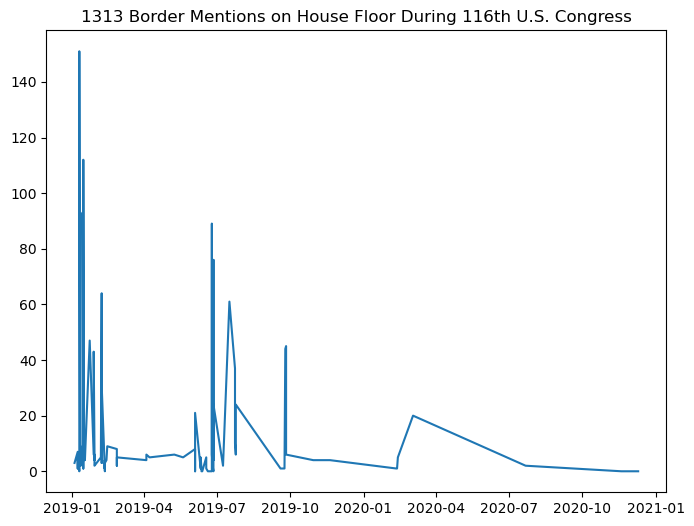

In [87]:
import matplotlib.pyplot as plt #adapting a script to make a time series from https://www.python-graph-gallery.com/basic-time-series-with-matplotlib
import matplotlib.dates as mdates
date = data_df["Date"]
value = data_df["count"]
fig, ax = plt.subplots(figsize=(8,6))
ax.plot(date, value);
plt.title("1313 Border Mentions on House Floor During 116th U.S. Congress")

In [30]:
from bs4 import BeautifulSoup #imported BeautifulSoup to remove html clutter from the text
with open("all_116_articles.txt","w") as file: #created one single file to store the retrieved text of each url
    for text in data_df['text']:
        soup = BeautifulSoup(text)
        article = soup.get_text()
        file.write(article)

In [31]:
! mkdir 116_Congress_files #created a folder for the corresponding text files

In [32]:
id = 0 
id += 1 #adapted workshop code to store each url text as a string in a file within 116_Congress_files 
    with open(f"116_Congress_files/116_article_{id}.txt", "w") as file:
        file.write(str(article))

In [78]:
#Part 3 - Cleaning the Text and Beginning to Analyze 
#Closely adapting the Web Scraping Workshop by Rebecca Krisel at https://github.com/rskrisel/web_scraping_workshop
#importing necessary libraries 
! mkdir 116_files_cleaned #made two new folders for cleaned text and wordclouds
! mkdir 116_wordclouds
import nltk

#after testing wordclouds, I appended words to stopwords to exclude irrevelant common words in the text 
from nltk.corpus import stopwords 
excess = ['congress','revise','congressional','ask','address','day','speaker','every','permission','publishing','online','today','know','go','tell','remark','give','office','page','biggs','first','record','member','vice','house','sunday','want','well','know','speaker','country','time','unanimous','consent','go','provide','madam','make','united','pro','yield','madam speaker','go','people','make','know','want','say','yield', 'house', 'bill','thing','make','think','even','put','use','senate amendment','say','let','one','way','see','u','talk','let one','many','number','say','amendment']
stops = stopwords.words('english')
stops.extend(excess)


from nltk import pos_tag
from nltk.corpus import wordnet 
from nltk.stem.wordnet import WordNetLemmatizer

from wordcloud import WordCloud    
import matplotlib.pyplot as plt

import glob

In [79]:
directory = "116_Congress_files"
files = glob.glob(f"{directory}/*.txt")#stored pathway to files in 'files' variable

In [457]:
def get_wordnet_pos(word): #implementing a function from workshop that lemmatizes
    """Map POS tag to first character lemmatize() accepts"""
    tag = nltk.pos_tag([word])[0][1][0].upper()
    tag_dict = {"J": wordnet.ADJ,
                "N": wordnet.NOUN,
                "V": wordnet.VERB,
                "R": wordnet.ADV}
    return tag_dict.get(tag, wordnet.NOUN)

In [458]:
id = 0 #adapting a for-loop from the workshop to lemmatize text data 
 for filepath in files:
    text = open(filepath, encoding='utf-8').read()
    text_tokens = nltk.word_tokenize(text)
    nltk_text = nltk.Text(text_tokens)
    text_lower = [t.lower() for t in nltk_text if t.isalnum()]
    text_stops = [t for t in text_lower if t in stops]
    text_clean = [WordNetLemmatizer().lemmatize(t, get_wordnet_pos(t)) for t in text_stops]
    id += 1 #storing the cleaned text in a corresponding file within the 116_files_cleaned folder
    with open(f"116_files_cleaned/116_article_cleaned_{id}.txt", "w") as file:
         file.write(str(text_clean))

In [19]:
conda install -c conda-forge wordcloud #installed WordCloud

Solving environment: done

## Package Plan ##

  environment location: /Users/williamedwards/opt/anaconda3

  added / updated specs:
    - wordcloud


The following packages will be SUPERSEDED by a higher-priority channel:

  ca-certificates    pkgs/main::ca-certificates-2023.01.10~ --> conda-forge::ca-certificates-2022.12.7-h033912b_0 
  certifi            pkgs/main/osx-64::certifi-2022.12.7-p~ --> conda-forge/noarch::certifi-2022.12.7-pyhd8ed1ab_0 
  openssl              pkgs/main::openssl-1.1.1t-hca72f7f_0 --> conda-forge::openssl-1.1.1t-hfd90126_0 




Preparing transaction: done
Verifying transaction: done
Executing transaction: done

Note: you may need to restart the kernel to use updated packages.


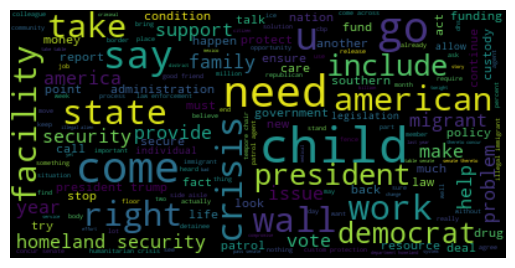

In [138]:

#Given that I want to compare both sessions, I chose to make one wordcloud for each session. 
all_text = open('all_116_articles.txt', encoding='utf-8').read()
text_tokens = nltk.word_tokenize(all_text)
nltk_text = nltk.Text(text_tokens)
text_lower = [t.lower() for t in nltk_text if t.isalnum()]
text_stops = [t for t in text_lower if t not in stops]
text_clean = [WordNetLemmatizer().lemmatize(t, get_wordnet_pos(t)) for t in text_stops]
unique_string=(" ").join(text_clean)
wordcloud = WordCloud(max_font_size=40).generate(unique_string)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

# Saving the word cloud for the 116th congress

wordcloud.to_file(f"116_wordcloud/116_word_cloud.png")

In [402]:
all_text = open('all_116_articles.txt', encoding='utf-8').read()#investigating uses of "China"
text_tokens = nltk.word_tokenize(all_text)
nltk_text = nltk.Text(text_tokens)
nltk_text.concordance('china')

Displaying 5 of 5 matches:
t is more like what you might see in China or Russia . In our system of crimina
esented from around the world , from China and Africa , that are coming into th
synthetic opioid that is produced in China and Mexico . It is either smuggled i
 United States through the mail from China or across our southern border from M
l , much of which is manufactured in China . This Congress , bipartisan , last 


In [95]:
nltk_text.similar('border') #investigating words that appear near 'border' in the transcripts

country president bill wall children senate government house time
aisle crisis way borders floor law nation problem world situation laws


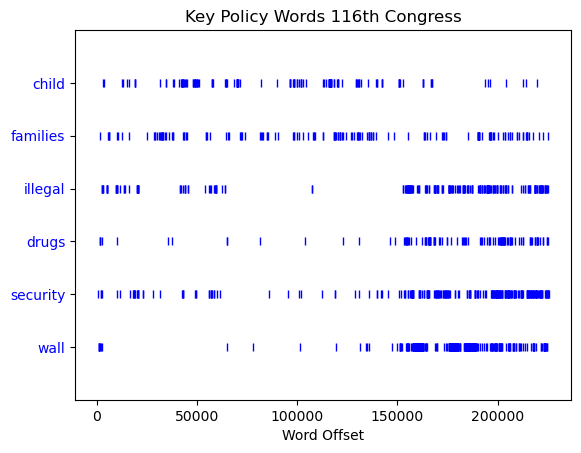

In [325]:
events = ["child", "families", "illegal", "drugs", "security", "wall"]
nltk.draw.dispersion_plot(nltk_text, events, ignore_case=False, title='Key Policy Words 116th Congress') #https://www.nltk.org/api/nltk.draw.dispersion_plot.html